# Lab 7
Seuillage global et adaptatif.

In [2]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
import numpy as np
from scipy import ndimage as ndi
from skimage.segmentation import watershed

## Exercice 1
Segmenter l'avant-plan de l'image avec le threshold d'Otsu. Avec le masque obtenu, retirer l'arrière-plan de l'image et afficher la.
> Utiliser la fonction `skimage.filters.threshold_otsu`

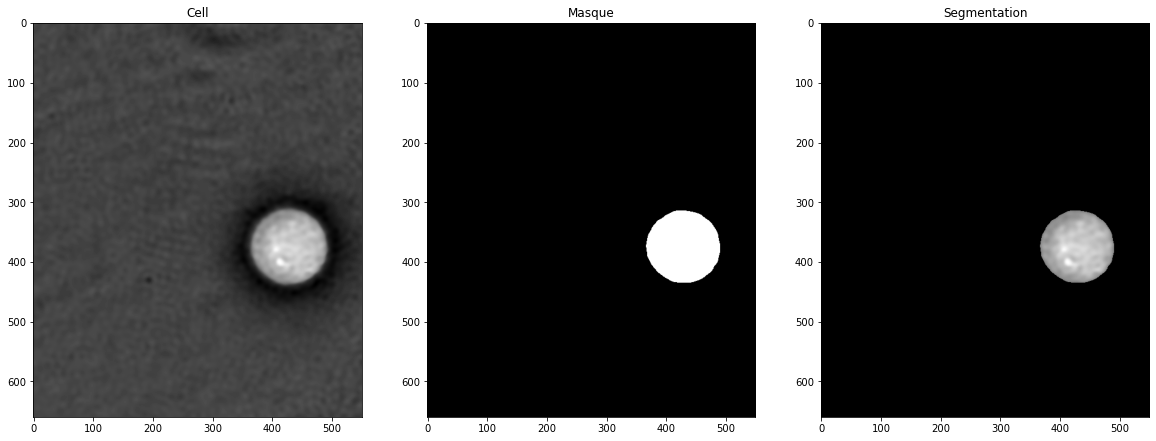

In [10]:
img = data.cell()
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

thresh = filters.threshold_otsu(img)
mask = img > thresh

plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img * mask
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()

## Exercice 2
Segmenter l'arrière-plan de l'image avec le threshold de Li. Avec le masque obtenu, retirer l'avant-plan de l'image et afficher l'arrière-plan..
> Utiliser la fonction `skimage.filters.threshold_li`

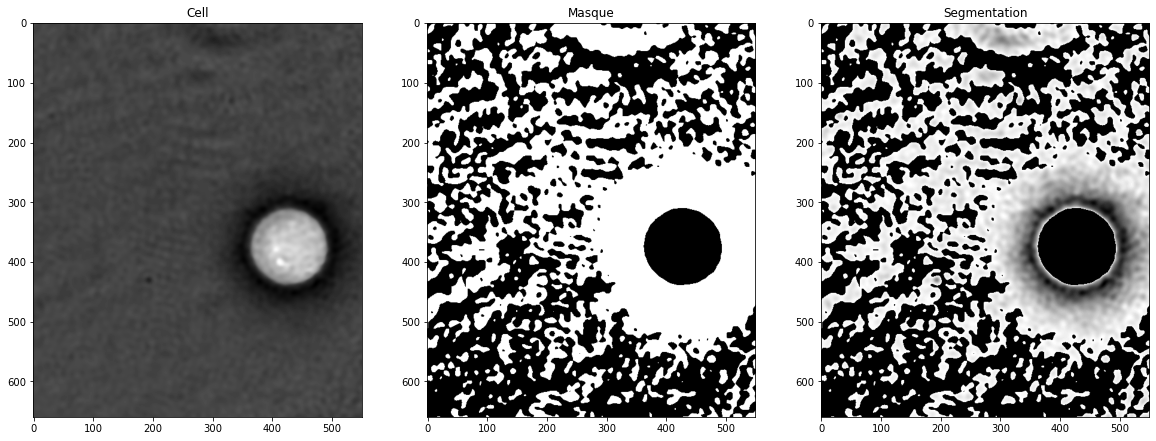

In [13]:
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

threshold = filters.threshold_li(img)
mask = img <= threshold
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img * mask
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()

## Exercice 3
Segmenter l'arrière-avant de l'image en suivant ces étapes:
- Trouver les coutours avec Sobel (`skimage.filters.sobel`)
- Utiliser la méthode watershed avec le `markers` déjà définit et les coutours trouver avec Sobel comme carte d'élévation (`skimage.segmentation.watershed`)
> Pris de https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#sphx-glr-auto-examples-applications-plot-coins-segmentation-py

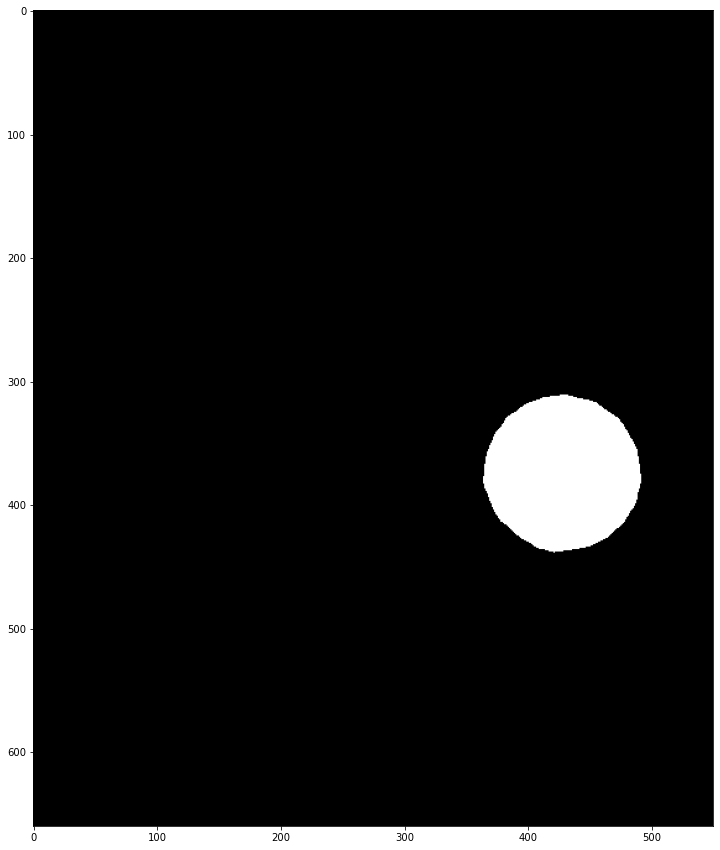

In [5]:
plt.figure(figsize=(20, 15))

markers = np.zeros_like(img)
# Seuillage a la main pour l'annotation
markers[img < 30] = 1
markers[img > 150] = 2

edges = filters.sobel(img)

sobeled = watershed(edges, markers)

plt.imshow(sobeled, cmap="gray")
plt.show()

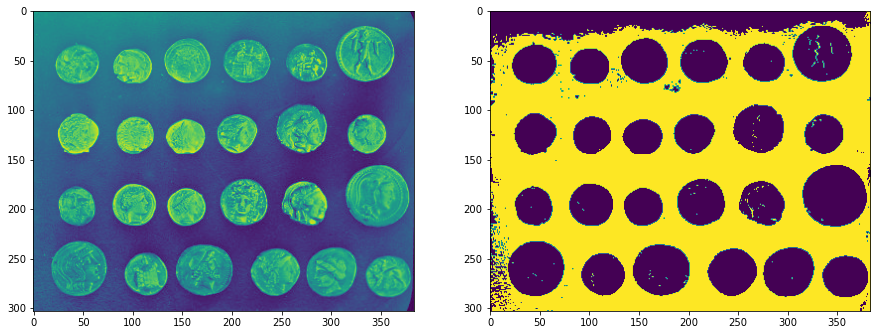

In [25]:
# seuillage local(ou adaptatif)

img = data.coins()
nib = filters.threshold_niblack(img, window_size = 201)
mod = img <= nib

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mod)
plt.show()